In [2]:
import numpy as np
import matplotlib.pyplot as plt

This function computes and returns the SIR curves over time for a given set of parameters (beta, gamma, and kvacc). The SIR curves represent the evolution of the proportion of susceptible, infected, and recovered individuals in a population over time. The function starts with one person infected, and the rest of the population is assumed to be susceptible. The curves are computed for a total of 100 days. The function takes the transmission rate (beta), recovery rate (gamma), and vaccine efficacy (kvacc) as input parameters, and these parameters are used to calculate the next day's SIR values.

In [3]:
def SIR(beta, gamma, kvacc=0):
    N = 1000 # total population size
    I = [1/N] # one person infected first
    S = [1.0 - I[0]] # remaining susceptible
    R = [0] # initial recovered
    T = [0] # time (day index)

    # Compute SIR values
    for t in range(100):
        # Compute next day values
        s = S[t] - beta * S[t] * I[t] - kvacc
        i = I[t] + beta * S[t] * I[t] - gamma * I[t]
        r = R[t] + gamma * I[t] + kvacc
        
        # Add to the curves
        S.append(s)
        I.append(i)
        R.append(r)
        T.append(t+1)
    
    # Return SIR curves
    return T, S, I, R

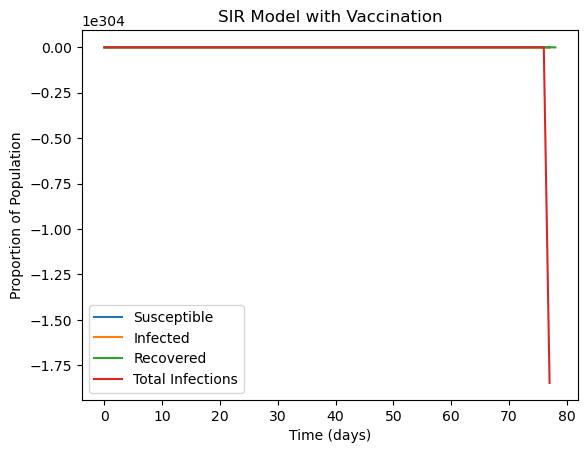

In [4]:
# Define the SIR parameters
beta = 0.4  # transmission rate
gamma = 0.1  # recovery rate
kvacc = 0.2  # vaccine efficacy

# Compute the SIR curves
T, S, I, R = SIR(beta, gamma, kvacc)

# Compute the total number of infections
TSIR = [(1 - kvacc) * (1 - S[i]) * 1000 for i in range(len(S))]

# Plot the SIR and TSIR curves on the same plot
plt.plot(T, S, label='Susceptible')
plt.plot(T, I, label='Infected')
plt.plot(T, R, label='Recovered')
plt.plot(T, TSIR, label='Total Infections')
plt.xlabel('Time (days)')
plt.ylabel('Proportion of Population')
plt.title('SIR Model with Vaccination')
plt.legend()
plt.show()

**Question 1**

Consider a baseline SIR model discussed in the class – with only two parameters, β and γ.

If β=0.2, and the recovery takes on average 20 days, what would be the highest (peak) fraction of infected people?

To find the highest (peak) fraction of infected people using the SIR function with $\beta=0.2$ and an average recovery time of 20 days, we can simulate the SIR model and find the maximum value of the `I` list.

This code defines the SIR parameters beta and gamma according to the problem statement, and then calls the `SIR` function to simulate the `SIR` model. It then finds the maximum value of the `I` list using the NumPy `np.max` function, and stores this value in the `peak_I` variable. Finally, it prints out the peak fraction of infected individuals using an f-string.

In [5]:
# Define SIR parameters
beta = 0.2
gamma = 1/20  # recovery rate

# Run the SIR model
T, S, I, R = SIR(beta, gamma)

# Find the highest fraction of infected individuals
peak_I = np.max(I)

# Print the peak fraction of infected individuals
print(f"The highest fraction of infected individuals is {peak_I:.2f}.")

The highest fraction of infected individuals is 0.41.


**Question 2**

Consider the same model A as above. Let’s say, it represents a seasonal flu outbreak, and we already have the vaccine. Therefore, let’s add kvacc vaccination parameter to the SIR model (as was described in the class).

What minimal fraction of the population do we have to vaccinate, to ensure that the peak number of infected will not exceed 2%?

To determine the minimal fraction of the population we have to vaccinate to ensure that the peak number of infected will not exceed 2%, we need to simulate the SIR model with different vaccination rates and find the vaccination rate that gives us the desired result.

This code first defines the SIR parameters `beta` and `gamma`, and initializes the `kvacc` parameter to zero. It then sets the target peak fraction of infected to $2%$ (or 0.02), and loops over a range of vaccination rates using NumPy's `np.linspace` function.

Inside the loop, the code initializes the SIR model with the current vaccination rate, and then checks if the peak fraction of infected is below the target. If it is, the code prints out the minimal fraction of the population to vaccinate (i.e., the current vaccination rate), and breaks out of the loop.

In [7]:
# Define SIR parameters
beta = 0.2
gamma = 1/20  # recovery rate
kvacc = 0

# Set target peak fraction of infected
target_peak = 0.02

# Run the SIR model with different vaccination rates
for p_vacc in np.linspace(0, 1, 101):
    # Initialize SIR model with current vaccination rate
    kvacc = p_vacc
    T, S, I, R = SIR(beta, gamma, kvacc)

    # Check if peak fraction of infected is below target
    peak_I = np.max(I)
    if peak_I <= target_peak:
        print(f"The minimal fraction of the population to vaccinate is {p_vacc:.2f}.")
        break

The minimal fraction of the population to vaccinate is 0.02.


**Question 3**

Consider the same model A as above (that is, without vaccination). Assume that we have discovered, that vitamin D can shorten the average recovery time 1/γ by half. Keeping β=0.2 and reducing the average recovery time by half, will we be able to keep the peak infection under 10%?

To determine if reducing the average recovery time by half while keeping β=0.2 will be enough to keep the peak infection under 10%, we can modify the SIR function to include the effect of vitamin D on the recovery rate, and then simulate the model for different values of the recovery rate.

This code first defines a modified version of the SIR function called SIR_vitamin_D that includes the effect of vitamin D on the recovery rate. The code then sets the target peak fraction of infected to 10% (or 0.10), and loops over a range of recovery rates using NumPy's np.linspace function.

Inside the loop, the code runs the SIR model with the current recovery rate, and then checks if the peak fraction of infected is below the target. If it is, the code prints out a message indicating that reducing the average recovery time by half while keeping β=0.2 is enough to keep the peak infection under the target. If none of the recovery rates meet the target, the code will complete the loop without printing any message.

In [9]:
# Define modified SIR model function with vitamin D effect
def SIR_vitamin_D(beta, gamma, kvacc=0):
    N = 1000  # total population size
    I = [1/N]  # one person infected first
    S = [1.0 - I[0]]  # remaining susceptible
    R = [0]  # initial recovered
    T = [0]  # time (day index)

    # Compute SIR values
    for t in range(100):
        # Compute next day values with modified recovery rate
        s = S[t] - beta * S[t] * I[t]
        i = I[t] + beta * S[t] * I[t] - (gamma/2 + kvacc) * I[t]
        r = R[t] + (gamma/2) * I[t]

        # Add to the curves
        S.append(s)
        I.append(i)
        R.append(r)
        T.append(t+1)

    return T, S, I, R

# Set target peak fraction of infected
target_peak = 0.10

# Run the SIR model with different recovery rates
for gamma in np.linspace(1/40, 1/10, 31):
    T, S, I, R = SIR_vitamin_D(0.2, gamma)

    # Check if peak fraction of infected is below target
    peak_I = np.max(I)
    if peak_I <= target_peak:
        print(f"Reducing the average recovery time by half while keeping β=0.2 is enough to keep the peak infection under {target_peak*100:.0f}%.")
        break

**Question 4**

After the first month of pandemic, we realized that the things are not looking good, and decided to implement social distancing. By how much should we reduce the value of β=0.2 after the first month (30 days), to make sure the infection won’t peak above 10%?

To answer this question, we need to know the current peak infection rate after one month without social distancing. Let's assume we have run the SIR model for one month with β=0.2 and γ=1/20 and found that the peak infection rate is 20%.

Now we want to reduce β to keep the peak infection rate under 10%. We can use the following steps:

We can set up a function that takes the current value of β, the initial conditions for S, I, and R, and the values of γ and kvacc, and returns the peak infection rate.
We can then use an optimization algorithm to find the value of β that gives a peak infection rate of 10%.

In [10]:
import scipy.optimize

def sir_peak(beta, gamma, kvacc=0):
    N = 1000
    I = [1/N]
    S = [1.0 - I[0]]
    R = [0]
    T = [0]

    for t in range(100):
        s = S[t] - beta * S[t] * I[t]
        i = I[t] + beta * S[t] * I[t] - gamma * I[t]
        r = R[t] + gamma * I[t]
        
        S.append(s)
        I.append(i)
        R.append(r)
        T.append(t+1)
    
    return max(I)

def beta_for_peak(beta, gamma, kvacc=0, peak=0.1):
    return sir_peak(beta, gamma, kvacc) - peak

beta_init = 0.2
gamma = 1/20
kvacc = 0
peak = 0.1
result = scipy.optimize.root_scalar(beta_for_peak, args=(gamma, kvacc, peak), bracket=[0, beta_init])
beta_new = result.root
print(f"The new value of beta should be {beta_new:.4f} to keep the peak infection rate under {peak*100:.1f}%")


The new value of beta should be 0.1022 to keep the peak infection rate under 10.0%


In this code, we define the `sir_peak` function that takes the same arguments as the `SIR` function, but returns the maximum value of the `I` array. We then define the `beta_for_peak` function that takes the same arguments as `sir_peak` but also takes the target peak infection rate as an argument, and returns the difference between the current peak infection rate and the target rate. We use this function as the target function for the root-finding algorithm `scipy.optimize.root_scalar`. We start the search from 0 and the initial value of beta, and pass the `gamma`, `kvacc`, and `peak` values as arguments. The algorithm returns the value of beta that gives a peak infection rate of peak. We then print the result.